In [303]:
!wget https://github.com/GuruChandra/DataSet/raw/refs/heads/main/titanic.zip

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [304]:
from zipfile import ZipFile

with ZipFile('titanic.zip') as zf:
    zf.extractall()

In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [309]:
target_df = pd.read_csv('gender_submission.csv')
target_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [310]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [311]:
test_df = pd.read_csv('test.csv')
test_df.head()

test_df.insert(1,'Survived',target_df['Survived'])
test_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [312]:
df = pd.concat([df, test_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [313]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0]).map({'female':0, 'male': 1 })
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [314]:
df['Age'].value_counts()

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
60.50     1
11.50     1
0.33      1
0.17      1
38.50     1
Name: count, Length: 98, dtype: int64

In [315]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [316]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Age'].isnull().value_counts()

Age
False    1309
Name: count, dtype: int64

<Axes: >

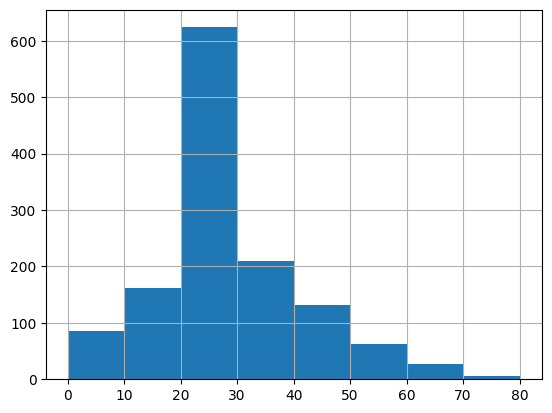

In [317]:
df['Age'].hist(bins=8)

#Created section based on Age since the data is very diverse.

#0-15 = 0

16-30 = 1

31-40 = 2

41-50 = 3

51-60 = 4

More than 61 = 5

In [318]:
def getAgeSubSection(age):
    #print(age)
    if age > 60:
        return 5
    elif age > 50:
        return 4
    elif age > 40:
        return 3
    elif age > 30:
        return 2
    #elif age > 20:
     #   return 2
    elif age > 15:
        return 1
    else:
        return 0
    
df['Age']=df['Age'].apply(lambda x: getAgeSubSection(x))
    

<Axes: >

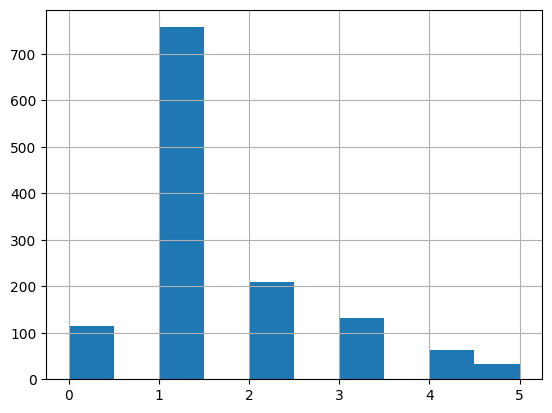

In [319]:
df['Age'].hist()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

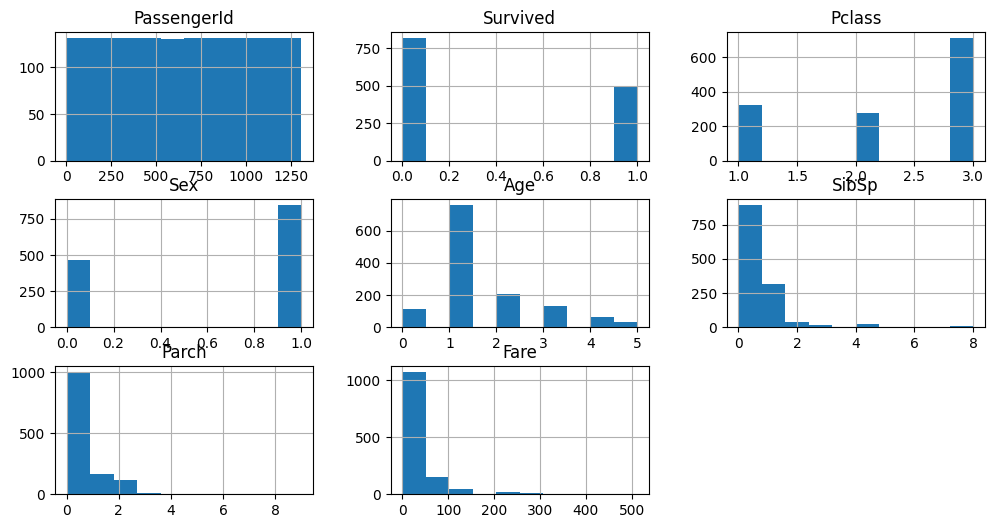

In [320]:

df.hist(figsize=(12,6))

#Observations
1. More males than females
2. Survived are less
3. 3rd class(Lower) people are more. 1st adn 2nd are almost equal
4. Young people (avg age 28)

In [321]:
survivedbyclass = df.groupby(['Pclass','Survived']).size().reset_index().rename(columns={0:'Count'})
survivedbyage = df.groupby(['Age','Survived']).size().reset_index().rename(columns={0:'Count'})
print(survivedbyclass)
print(survivedbyage)

   Pclass  Survived  Count
0       1         0    137
1       1         1    186
2       2         0    160
3       2         1    117
4       3         0    518
5       3         1    191
    Age  Survived  Count
0     0         0     53
1     0         1     62
2     1         0    499
3     1         1    258
4     2         0    121
5     2         1     89
6     3         0     84
7     3         1     48
8     4         0     34
9     4         1     28
10    5         0     24
11    5         1      9


<Axes: xlabel='Age', ylabel='Count'>

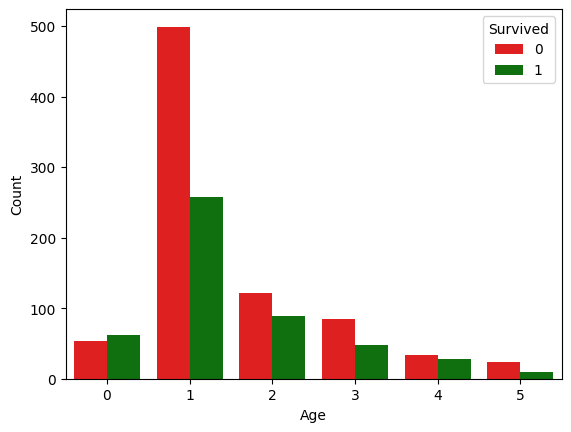

In [322]:
sns.barplot(x='Age',y='Count',hue='Survived',data=survivedbyage,palette=['red','green'])


<Axes: xlabel='Pclass', ylabel='Count'>

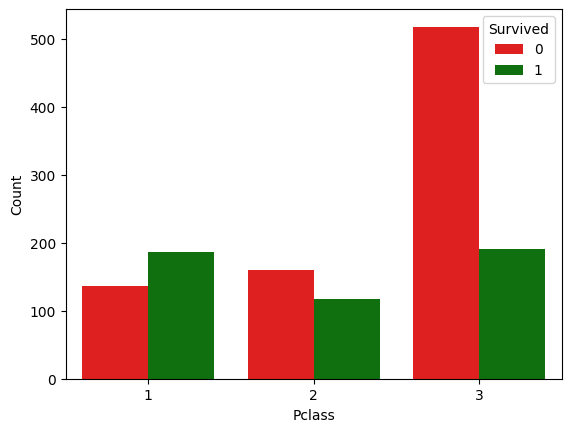

In [323]:
sns.barplot(x='Pclass',y='Count',hue='Survived',data=survivedbyclass,palette=['red','green'])

#Observations:
1. Second class survival percentage > First Class >> Third class

2. Survived in quantity :Childen >> ... >> youngsters

In [324]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S


<Axes: >

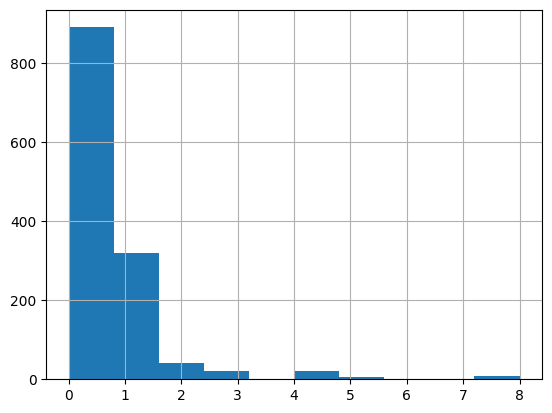

In [325]:
df['SibSp'].hist()

In [326]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [327]:
survivedbystartlocation=df.groupby(['Survived','Embarked']).size().reset_index().rename(columns={0:'Count'})
survivedbystartlocation

,Survived,Embarked,Count
0,0,C,137
1,0,Q,69
2,0,S,609
3,1,C,133
4,1,Q,54
5,1,S,305


In [328]:
print(f"survival percentage of C: {survivedbystartlocation['Count'][3]/(survivedbystartlocation['Count'][3]+survivedbystartlocation['Count'][0])}")
print(f"survival percentage of Q: {survivedbystartlocation['Count'][4]/(survivedbystartlocation['Count'][4]+survivedbystartlocation['Count'][1])}")
print(f"survival percentage of S: {survivedbystartlocation['Count'][5]/(survivedbystartlocation['Count'][5]+survivedbystartlocation['Count'][2])}")

survival percentage of C: 0.4925925925925926
survival percentage of Q: 0.43902439024390244
survival percentage of S: 0.3336980306345733


<Axes: xlabel='Embarked', ylabel='Count'>

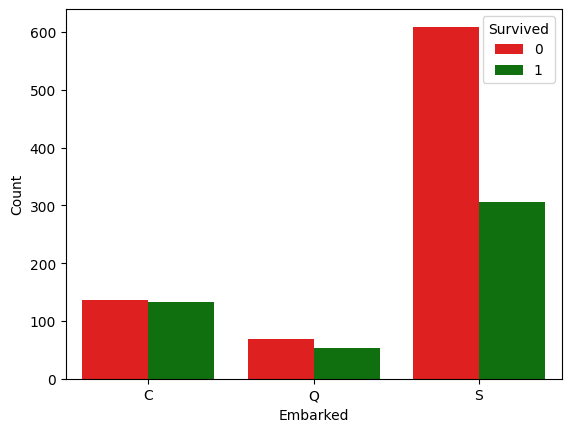

In [329]:
sns.barplot(x='Embarked',y='Count',hue='Survived',data=survivedbystartlocation,palette=['red','green'])

In [330]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = (df['Embarked'].map({'C':0, 'S':1, 'Q':2})).astype(int)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 132.9+ KB


In [332]:
from sklearn.preprocessing import StandardScaler
sibSp_scalingObj = StandardScaler()
df['SibSp'] =sibSp_scalingObj.fit_transform(df[['SibSp']]) # or .to_numpy().reshape(-1,1))
df['SibSp'].unique()

array([ 0.48128777, -0.47908676,  2.40203684,  3.36241137,  1.4416623 ,
        4.3227859 ,  7.2039095 ])

In [333]:
df['Cabin'].isnull().sum()

np.int64(1014)

In [334]:

df['Cabin']=df['Cabin'].fillna("X").map(lambda x: x[0])

In [335]:
groupclassbyCabin = df.groupby(['Pclass','Cabin']).size().reset_index().rename(columns={0:'Count'})
groupclassbyCabin

,Pclass,Cabin,Count
0,1,A,22
1,1,B,65
2,1,C,94
3,1,D,40
4,1,E,34
5,1,T,1
6,1,X,67
7,2,D,6
8,2,E,4
9,2,F,13


<Axes: xlabel='Cabin', ylabel='Count'>

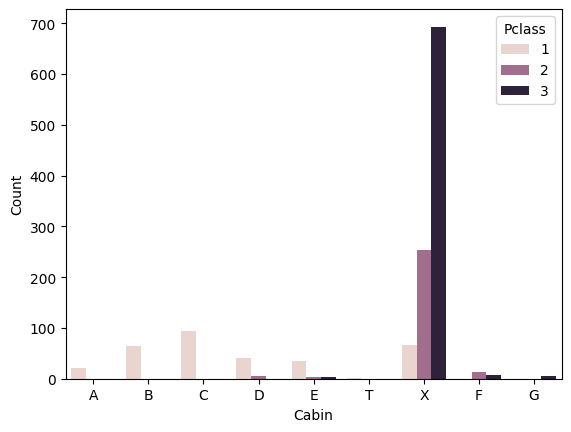

In [336]:
sns.barplot(x='Cabin',y='Count',hue='Pclass', data = groupclassbyCabin)

In [337]:
def assignCabin(row):
    if row.Cabin == 'X':
        if row.Pclass == 1 :
            return 'C'
        elif row.Pclass == 2:
            return 'F'
        else:
            return 'G'
    else:
        return row.Cabin
df['Cabin']=df.apply(lambda row: assignCabin(row),axis=1)


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 132.9+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cabinEncode = OrdinalEncoder()
df['Cabin']=(cabinEncode.fit_transform(df[['Cabin']])).astype(int)
df['Cabin']

0      6
1      2
2      6
3      2
4      6
      ..
413    6
414    2
415    6
416    6
417    6
Name: Cabin, Length: 1309, dtype: int64

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   float64
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 132.9+ KB


In [341]:
df.drop(columns=['PassengerId','Name','Ticket','Fare'],inplace=True,axis=1)

In [342]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,1,0.481288,0,6,1
1,1,1,0,2,0.481288,0,2,0
2,1,3,0,1,-0.479087,0,6,1
3,1,1,0,2,0.481288,0,2,1
4,0,3,1,2,-0.479087,0,6,1


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   int64  
 4   SibSp     1309 non-null   float64
 5   Parch     1309 non-null   int64  
 6   Cabin     1309 non-null   int64  
 7   Embarked  1309 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 92.0 KB


In [352]:
df_np = df.to_numpy()
X_train,y_train = df_np[:-418,1:],df_np[:-418,0]
X_test,y_test = df_np[-418:,1:],df_np[-418:,0]

In [353]:
X_train.shape

(891, 7)

In [354]:
X_test.shape

(418, 7)

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test),target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.97      0.93      0.95       266
    Survived       0.89      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

